In [1]:
import numpy as np
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Restaurant_Reviews.tsv', delimiter='\t', quoting=3)

In [3]:
print("Dataset Shape:", df.shape)

Dataset Shape: (1000, 2)


In [4]:
print("Columns:", df.columns)

Columns: Index(['Review', 'Liked'], dtype='object')


In [5]:
print(df.head())

                                              Review  Liked
0                           Wow... Loved this place.      1
1                                 Crust is not good.      0
2          Not tasty and the texture was just nasty.      0
3  Stopped by during the late May bank holiday of...      1
4  The selection on the menu was great and so wer...      1


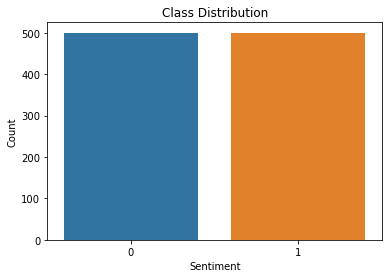

In [6]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Liked', data=df)
plt.title('Class Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [7]:
# Data Preprocessing
corpus = []
ps = PorterStemmer()
for i in range(0, 1000):
    review = re.sub('[^a-zA-Z]', ' ', df['Review'][i])
    review = review.lower()
    review_words = review.split()
    review_words = [word for word in review_words if not word in set(stopwords.words('english'))]
    review = [ps.stem(word) for word in review_words]
    review = ' '.join(review)
    corpus.append(review)

In [8]:
# Creating the Bag of Words model
cv = CountVectorizer(max_features=1500)
X = cv.fit_transform(corpus).toarray()
y = df.iloc[:, 1].values

In [9]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [10]:
# Training the classifier
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

MultinomialNB()

In [11]:
# Evaluating the classifier
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

In [12]:
# Displaying results
print("\nMultinomial Naive Bayes Classifier:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")


Multinomial Naive Bayes Classifier:
Accuracy: 0.77
Precision: 0.76
Recall: 0.79


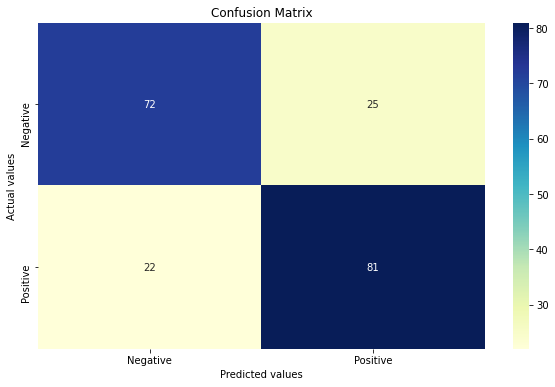

In [13]:
# Plotting the confusion matrix
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, cmap="YlGnBu", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix')
plt.show()

In [14]:
# Support Vector Machine (SVM) Classifier - Model Training and Testing

from sklearn.svm import SVC

# Training the classifier
classifier = SVC(kernel='linear', C=1.0, random_state=0)
classifier.fit(X_train, y_train)

# Evaluating the classifier
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# Displaying results
print("\nSupport Vector Machine (SVM) Classifier:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print("Confusion Matrix:")
print(cm)



Support Vector Machine (SVM) Classifier:
Accuracy: 0.72
Precision: 0.75
Recall: 0.68
Confusion Matrix:
[[74 23]
 [33 70]]


In [15]:
# Decision Tree Classifier - Model Training and Testing

from sklearn.tree import DecisionTreeClassifier

# Training the classifier
classifier = DecisionTreeClassifier(random_state=0)
classifier.fit(X_train, y_train)

# Evaluating the classifier
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# Displaying results
print("\nDecision Tree Classifier:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print("Confusion Matrix:")
print(cm)



Decision Tree Classifier:
Accuracy: 0.65
Precision: 0.69
Recall: 0.57
Confusion Matrix:
[[71 26]
 [44 59]]


In [16]:
#Random Forest Classifier - Model Training and Testing

from sklearn.ensemble import RandomForestClassifier

# Training the classifier
classifier = RandomForestClassifier(random_state=0)
classifier.fit(X_train, y_train)

# Evaluating the classifier
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# Displaying results
print("\nRandom Forest Classifier:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print("Confusion Matrix:")
print(cm)



Random Forest Classifier:
Accuracy: 0.70
Precision: 0.82
Recall: 0.53
Confusion Matrix:
[[85 12]
 [48 55]]


In [17]:
#AdaBoost Classifier - Model Training and Testing

from sklearn.ensemble import AdaBoostClassifier

# Training the classifier
classifier = AdaBoostClassifier(random_state=0)
classifier.fit(X_train, y_train)

# Evaluating the classifier
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# Displaying results
print("\nAdaBoost Classifier:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print("Confusion Matrix:")
print(cm)



AdaBoost Classifier:
Accuracy: 0.71
Precision: 0.88
Recall: 0.50
Confusion Matrix:
[[90  7]
 [51 52]]


In [18]:
# Gradient Boosting Classifier - Model Training and Testing

from sklearn.ensemble import GradientBoostingClassifier

# Training the classifier
classifier = GradientBoostingClassifier(random_state=0)
classifier.fit(X_train, y_train)

# Evaluating the classifier
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# Displaying results
print("\nGradient Boosting Classifier:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print("Confusion Matrix:")
print(cm)



Gradient Boosting Classifier:
Accuracy: 0.74
Precision: 0.90
Recall: 0.55
Confusion Matrix:
[[91  6]
 [46 57]]


In [19]:
#Logistic Regression Classifier - Model Training and Testing

from sklearn.linear_model import LogisticRegression

# Training the classifier
classifier = LogisticRegression(max_iter=1000)
classifier.fit(X_train, y_train)

# Evaluating the classifier
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# Displaying results
print("\nLogistic Regression Classifier:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print("Confusion Matrix:")
print(cm)



Logistic Regression Classifier:
Accuracy: 0.71
Precision: 0.76
Recall: 0.64
Confusion Matrix:
[[76 21]
 [37 66]]


In [20]:
#K-Nearest Neighbors (KNN) Classifier - Model Training and Testing

from sklearn.neighbors import KNeighborsClassifier

# Training the classifier
classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train)

# Evaluating the classifier
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# Displaying results
print("\nK-Nearest Neighbors (KNN) Classifier:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print("Confusion Matrix:")
print(cm)



K-Nearest Neighbors (KNN) Classifier:
Accuracy: 0.58
Precision: 0.64
Recall: 0.46
Confusion Matrix:
[[70 27]
 [56 47]]


C:\Users\bsakt\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [21]:
#Gaussian Naive Bayes Classifier - Model Training and Testing

from sklearn.naive_bayes import GaussianNB

# Training the classifier
classifier = GaussianNB()
classifier.fit(X_train, y_train)

# Evaluating the classifier
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# Displaying results
print("\nGaussian Naive Bayes Classifier:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print("Confusion Matrix:")
print(cm)



Gaussian Naive Bayes Classifier:
Accuracy: 0.73
Precision: 0.68
Recall: 0.88
Confusion Matrix:
[[55 42]
 [12 91]]


In [31]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create a word cloud for positive reviews
positive_reviews = [review for review in corpus if df['Sentiment'][corpus.index(review)] == 'Positive']
wordcloud = WordCloud().generate(' '.join(positive_reviews))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Create a word cloud for negative reviews
negative_reviews = [review for review in corpus if df['Sentiment'][corpus.index(review)] == 'Negative']
wordcloud = WordCloud().generate(' '.join(negative_reviews))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

KeyError: 'Sentiment'

In [22]:
#Extra Trees Classifier - Model Training and Testing

from sklearn.ensemble import ExtraTreesClassifier

# Training the classifier
classifier = ExtraTreesClassifier(random_state=0)
classifier.fit(X_train, y_train)

# Evaluating the classifier
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# Displaying results
print("\nExtra Trees Classifier:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print("Confusion Matrix:")
print(cm)



Extra Trees Classifier:
Accuracy: 0.70
Precision: 0.78
Recall: 0.59
Confusion Matrix:
[[80 17]
 [42 61]]


In [23]:
#Support Vector Machine (SVM) Classifier with RBF Kernel - Model Training and Testing

from sklearn.svm import SVC

# Training the classifier
classifier = SVC(kernel='rbf', random_state=0)
classifier.fit(X_train, y_train)

# Evaluating the classifier
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# Displaying results
print("\nSupport Vector Machine (SVM) Classifier with RBF Kernel:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print("Confusion Matrix:")
print(cm)



Support Vector Machine (SVM) Classifier with RBF Kernel:
Accuracy: 0.73
Precision: 0.89
Recall: 0.55
Confusion Matrix:
[[90  7]
 [46 57]]


In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB

# Define the parameter grid
param_grid = {
    'alpha': [0.1, 0.5, 1.0, 1.5, 2.0],  # Smoothing parameter
}

# Create the Multinomial Naive Bayes classifier
nb_classifier = MultinomialNB()

# Perform grid search cross-validation
grid_search = GridSearchCV(estimator=nb_classifier, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Accuracy:", best_score)

# Use the best model for prediction
best_nb_classifier = grid_search.best_estimator_
y_pred = best_nb_classifier.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# Display evaluation metrics
print("\nEvaluation Metrics for Best Multinomial Naive Bayes Classifier:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print("Confusion Matrix:")
print(cm)


Best Parameters: {'alpha': 2.0}
Best Accuracy: 0.7599992490589771

Evaluation Metrics for Best Multinomial Naive Bayes Classifier:
Accuracy: 0.77
Precision: 0.77
Recall: 0.78
Confusion Matrix:
[[73 24]
 [23 80]]


In [25]:
# Training the classifier with tuned hyperparameters
tuned_classifier = MultinomialNB(alpha=0.1)  # Adjust alpha value as needed
tuned_classifier.fit(X_train, y_train)

# Evaluating the tuned classifier
y_pred_tuned = tuned_classifier.predict(X_test)
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
precision_tuned = precision_score(y_test, y_pred_tuned)
recall_tuned = recall_score(y_test, y_pred_tuned)
cm_tuned = confusion_matrix(y_test, y_pred_tuned)

# Displaying results for the tuned classifier
print("\nTuned Multinomial Naive Bayes Classifier:")
print(f"Accuracy: {accuracy_tuned:.2f}")
print(f"Precision: {precision_tuned:.2f}")
print(f"Recall: {recall_tuned:.2f}")
print("Confusion Matrix:")
print(cm_tuned)



Tuned Multinomial Naive Bayes Classifier:
Accuracy: 0.78
Precision: 0.78
Recall: 0.81
Confusion Matrix:
[[73 24]
 [20 83]]


In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB

# Define the parameter grid
param_grid = {
    'alpha': [0.1, 0.5, 1.0, 1.5, 2.0],  # Smoothing parameter
    'fit_prior': [True, False]  # Whether to learn class prior probabilities or not
}

# Create the Multinomial Naive Bayes classifier
nb_classifier = MultinomialNB()

# Perform grid search cross-validation
grid_search = GridSearchCV(estimator=nb_classifier, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Accuracy:", best_score)

# Use the best model for prediction
best_nb_classifier = grid_search.best_estimator_
y_pred = best_nb_classifier.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# Display evaluation metrics
print("\nEvaluation Metrics for Best Multinomial Naive Bayes Classifier:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print("Confusion Matrix:")
print(cm)


Best Parameters: {'alpha': 2.0, 'fit_prior': True}
Best Accuracy: 0.7599992490589771

Evaluation Metrics for Best Multinomial Naive Bayes Classifier:
Accuracy: 0.77
Precision: 0.77
Recall: 0.78
Confusion Matrix:
[[73 24]
 [23 80]]


In [27]:
# Example review
review_example = "The food was delicious and the service was excellent!"

# Preprocess the review
review_example = re.sub('[^a-zA-Z]', ' ', review_example)
review_example = review_example.lower()
review_words = review_example.split()
review_words = [word for word in review_words if not word in set(stopwords.words('english'))]
review_example = [ps.stem(word) for word in review_words]
review_example = ' '.join(review_example)

# Vectorize the preprocessed review
review_example_vectorized = cv.transform([review_example]).toarray()

# Predict sentiment using the trained classifier
sentiment_prediction = classifier.predict(review_example_vectorized)

# Map sentiment label to human-readable format
sentiment_label = "Positive" if sentiment_prediction[0] == 1 else "Negative"

print("Review:", review_example)
print("Predicted Sentiment:", sentiment_label)


Review: food delici servic excel
Predicted Sentiment: Positive


In [28]:
# Example negative review
review_example_negative = "The food was terrible, and the service was slow and rude."

# Preprocess the review
review_example_negative = re.sub('[^a-zA-Z]', ' ', review_example_negative)
review_example_negative = review_example_negative.lower()
review_words = review_example_negative.split()
review_words = [word for word in review_words if not word in set(stopwords.words('english'))]
review_example_negative = [ps.stem(word) for word in review_words]
review_example_negative = ' '.join(review_example_negative)

# Vectorize the preprocessed review
review_example_negative_vectorized = cv.transform([review_example_negative]).toarray()

# Predict sentiment using the trained classifier
sentiment_prediction_negative = classifier.predict(review_example_negative_vectorized)

# Map sentiment label to human-readable format
sentiment_label_negative = "Negative" if sentiment_prediction_negative[0] == 0 else "Positive"

print("Review:", review_example_negative)
print("Predicted Sentiment:", sentiment_label_negative)


Review: food terribl servic slow rude
Predicted Sentiment: Negative


In [29]:
!pip install wordcloud

In [30]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create a word cloud for positive reviews
positive_reviews = [review for review in corpus if df['Sentiment'][corpus.index(review)] == 'Positive']
wordcloud = WordCloud().generate(' '.join(positive_reviews))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Create a word cloud for negative reviews
negative_reviews = [review for review in corpus if df['Sentiment'][corpus.index(review)] == 'Negative']
wordcloud = WordCloud().generate(' '.join(negative_reviews))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

KeyError: 'Sentiment'